# Credit Card Fraud Detection Analysis

## Problem Statement
Credit card fraud causes significant financial losses worldwide.  
The objective of this project is to identify fraudulent transactions using machine learning models and analyze fraud patterns based on transaction time and transaction amount.

### Objectives
- Detect fraudulent credit card transactions
- Handle highly imbalanced data
- Compare multiple machine learning models
- Analyze fraud behavior using time and amount-based insights
- Visualize results using an interactive Power BI dashboard


## Tools & Technologies
- Python (NumPy, Pandas, Scikit-learn, XGBoost)
- Data Visualization (Matplotlib, Seaborn)
- Power BI (Dashboard & Analytics)
- Jupyter Notebook


### Import Libraries


In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

import warnings
warnings.filterwarnings("ignore")

print("Environment ready")


Environment ready


### Load Dataset

In [36]:
df = pd.read_csv("../creditcard.csv")

print("Dataset loaded successfully")
df.head()


Dataset loaded successfully


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Overview


In [31]:
print("Shape:", df.shape)
print("\nClass distribution:")
print(df['Class'].value_counts())


Shape: (284807, 31)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


## Basic Exploratory Data Analysis (EDA)

### Class Distribution (Fraud vs Non-Fraud)
The dataset is highly imbalanced, where fraudulent transactions represent less than 0.2% of total transactions.


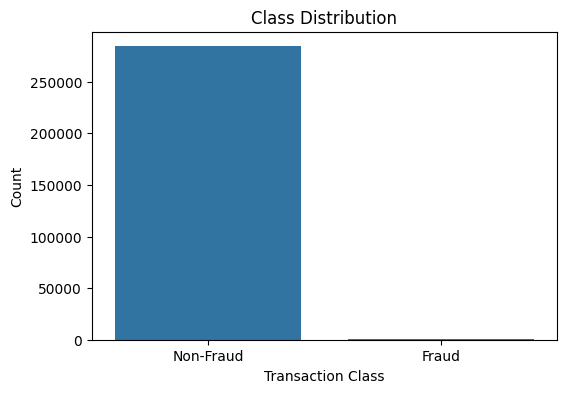

Class
0    284315
1       492
Name: count, dtype: int64

In [37]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Transaction Class")
plt.show()

class_counts


### Transaction Amount Distribution
Fraudulent transactions tend to occur at higher transaction amounts compared to non-fraudulent ones.


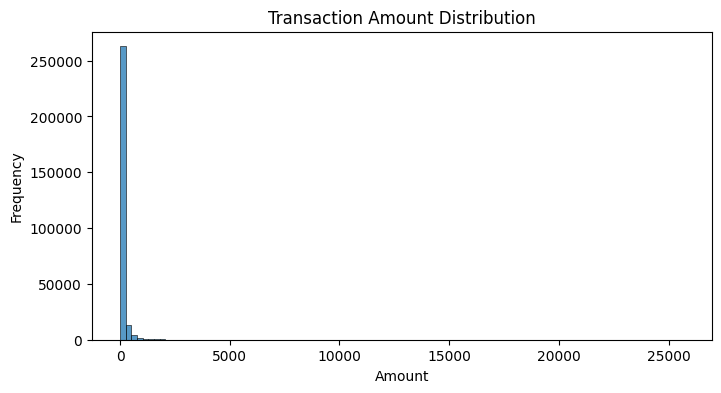

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=False)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

### Fraud vs Non-Fraud Amount Comparison


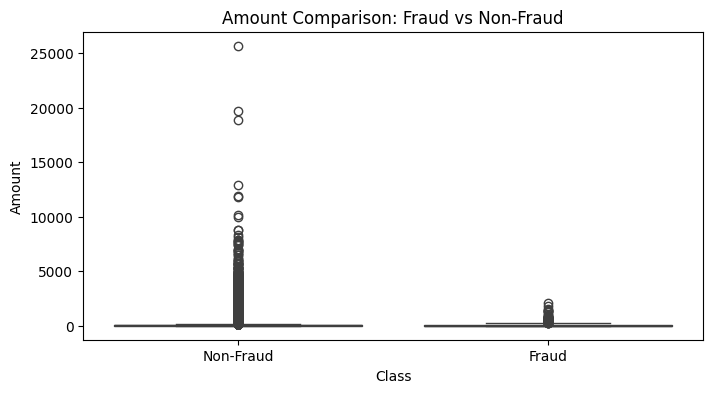

In [41]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.title("Amount Comparison: Fraud vs Non-Fraud")
plt.show()

## Feature Engineering for Power BI (Hour + Amount Range)
We create:
- **Hour** from Time
- **AmountRange** bins for heatmap & slicers


In [42]:
# Hour from Time (Time is seconds in original Kaggle dataset)
df["Hour"] = (df["Time"] // 3600) % 24

# Amount Range bins
def amount_bucket(a):
    if a < 50: return "< ₹50"
    if a < 100: return "₹50–₹100"
    if a < 500: return "₹100–₹500"
    if a < 1000: return "₹500–₹1000"
    if a < 5000: return "₹1000–₹5000"
    return "₹5000+"

df["AmountRange"] = df["Amount"].apply(amount_bucket)

df[["Time","Hour","Amount","AmountRange","Class"]].head()


,Time,Hour,Amount,AmountRange,Class
0,0.0,0.0,149.62,₹100–₹500,0
1,0.0,0.0,2.69,< ₹50,0
2,1.0,0.0,378.66,₹100–₹500,0
3,1.0,0.0,123.50,₹100–₹500,0
4,2.0,0.0,69.99,₹50–₹100,0


## Train-Test Split

In [39]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (199364, 30)
Test set shape: (85443, 30)


# Model 1: Logistic Regression

In [57]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, log_pred))

log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1:", log_f1)


Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.63      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.8454545454545455
Recall: 0.6283783783783784
F1: 0.7209302325581395


# Model 2: Random Forest

In [51]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, rf_pred))

rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1:", rf_f1)


Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.78      0.87       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.9666666666666667
Recall: 0.7837837837837838
F1: 0.8656716417910447


# Model 3: XGBoost

In [45]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Report")
print(classification_report(y_test, xgb_pred))

xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1:", xgb_f1)


XGBoost Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.79      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.9512195121951219
Recall: 0.7905405405405406
F1: 0.8634686346863468


# Hybrid Model (Ensemble)
Hybrid = Majority vote between Logistic + RF + XGB  
(If at least 2 models predict fraud → Fraud)

In [58]:
hybrid_pred = (
    (log_pred + rf_pred + xgb_pred) >= 2
).astype(int)

print("Hybrid Model Report")
print(classification_report(y_test, hybrid_pred))

hybrid_precision = precision_score(y_test, hybrid_pred)
hybrid_recall = recall_score(y_test, hybrid_pred)
hybrid_f1 = f1_score(y_test, hybrid_pred)

print("Precision:", hybrid_precision)
print("Recall:", hybrid_recall)
print("F1:", hybrid_f1)


Hybrid Model Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.99      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Precision: 0.9739130434782609
Recall: 0.7567567567567568
F1: 0.8517110266159695


## Confusion Matrix

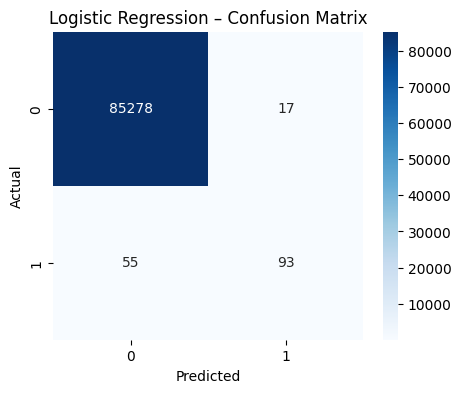

In [60]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Metrics Comparison Table

In [ ]:
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Hybrid Ensemble"],
    "Precision": [log_precision, rf_precision, xgb_precision, hybrid_precision],
    "Recall": [log_recall, rf_recall, xgb_recall, hybrid_recall],
    "F1-Score": [log_f1, rf_f1, xgb_f1, hybrid_f1]
})

metrics_df

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.845455,0.628378,0.720930
1,Random Forest,0.966667,0.783784,0.865672
2,XGBoost,0.951220,0.790541,0.863469
3,Hybrid Ensemble,0.973913,0.756757,0.851711


## Export Final CSV for Power BI
We export dataset with:
- Hour
- AmountRange
- Model predictions
- Hybrid prediction


In [48]:
df_export = df.copy()

# Add model predictions for PowerBI
df_export["Logistic_Pred"] = log_model.predict(X)
df_export["RF_Pred"] = rf_model.predict(X)
df_export["XGB_Pred"] = xgb_model.predict(X)

df_export["Hybrid_Prediction"] = (
    (df_export["Logistic_Pred"] + df_export["RF_Pred"] + df_export["XGB_Pred"]) >= 2
).astype(int)

export_path = "../Data/fraud_dashboard_data.csv"
df_export.to_csv(export_path, index=False)

print("Exported successfully to:", export_path)

Exported successfully to: ../Data/fraud_dashboard_data.csv


## Conclusion / Insights
- Fraud cases are extremely rare in this dataset (high class imbalance)
- Fraud transaction amounts often differ from normal transactions
- Random Forest and XGBoost generally improve precision compared to Logistic Regression
- Hybrid ensemble gives more stable fraud detection performance
- Power BI dashboard helps visualize fraud patterns by Hour and Amount Range